<a href="https://colab.research.google.com/github/Rpon17/plant_lover/blob/main/best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è YOLOv5 ÌÅ¥Î°†
!pip install roboflow
!git clone https://github.com/ultralytics/yolov5  # YOLOv5 Ï†ÄÏû•ÏÜå ÌÅ¥Î°†
%cd yolov5
!pip install -r requirements.txt

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 80.9/80.9 kB 3.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 25.35 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.
/content/yolov5
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 879.0/879.0 kB 16.0 MB/s eta 0:00:00


In [2]:
# Step 1: RoboflowÏóêÏÑú Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú
from roboflow import Roboflow
rf = Roboflow(api_key="3BzXsmqgRvmWY1ecSbNO")
project = rf.workspace("temp-3-pm4kq").project("leaf-izwde")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to leaf-1 in yolov5pytorch:: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47291/47291 [00:08<00:00, 5349.44it/s]


In [3]:
# Îç∞Ïù¥ÌÑ∞ÏÖã ÏúÑÏπò ÏÑ§Ï†ï
base_dir = "/content/yolov5/leaf-1"

In [4]:
# Step 2: Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ train, valid, testÎ°ú ÎÇòÎàÑÍ∏∞ (7:2:1 ÎπÑÏú®)
import os
import random
import shutil

images_dir = os.path.join(base_dir, "train/images")
labels_dir = os.path.join(base_dir, "train/labels")


In [5]:
# Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎàå ÏÉàÎ°úÏö¥ ÎîîÎ†âÌÑ∞Î¶¨ ÏÉùÏÑ±
for split in ["train", "valid", "test"]:
    os.makedirs(f"{base_dir}/{split}/images", exist_ok=True)
    os.makedirs(f"{base_dir}/{split}/labels", exist_ok=True)

# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
image_files = [f for f in os.listdir(images_dir) if f.endswith(".jpg")]

# Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÑûÏùå (ÎûúÎç§ ÏÖîÌîå)
random.seed(42)  # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ ÏãúÎìú ÏÑ§Ï†ï
random.shuffle(image_files)

# Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞ Í≥ÑÏÇ∞ (7:2:1 ÎπÑÏú®)
total_images = len(image_files)
train_size = int(total_images * 0.7)
valid_size = int(total_images * 0.2)

# Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†
train_files = image_files[:train_size]
valid_files = image_files[train_size:train_size + valid_size]
test_files = image_files[train_size + valid_size:]

In [6]:
# ÌååÏùº Ïù¥Îèô Ìï®Ïàò Ï†ïÏùò
def move_files(file_list, dest_dir):
    for file_name in file_list:
        # Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ïù¥Îèô
        src_image_path = os.path.join(images_dir, file_name)
        dest_image_path = os.path.join(dest_dir, "images", file_name)
        if os.path.exists(src_image_path):
            shutil.move(src_image_path, dest_image_path)
        # ÎùºÎ≤® ÌååÏùº Ïù¥Îèô (.txt ÌôïÏû•Ïûê)
        label_file = file_name.replace(".jpg", ".txt")
        src_label_path = os.path.join(labels_dir, label_file)
        dest_label_path = os.path.join(dest_dir, "labels", label_file)
        if os.path.exists(src_label_path):
            shutil.move(src_label_path, dest_label_path)

# ÌååÏùº Ïù¥Îèô ÏàòÌñâ
move_files(train_files, f"{base_dir}/train")
move_files(valid_files, f"{base_dir}/valid")
move_files(test_files, f"{base_dir}/test")

print("Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [7]:
# Í±¥Í∞ïÌïú ÏãùÎ¨ºÍ≥º Í±¥Í∞ïÌïòÏßÄ ÏïäÏùÄ ÏãùÎ¨º ÌÅ¥ÎûòÏä§Î•º Ï†ïÏùò
healthy_classes = [
    'Apple leaf', 'Bell_pepper leaf', 'Blueberry leaf', 'Cassava_Healthy',
    'Cherry leaf', 'Corn Healthy', 'Eggplant___Healthy_fruit',
    'Eggplant___Healthy_leaf', 'Potato___Healthy_fruit', 'Potato___Healthy_leaf',
    'Soyabean leaf', 'Strawberry leaf', 'Tomato___Healthy_fruit',
    'Tomato___Healthy_leaf', 'Tomato_healthy', 'grape leaf'
]

unhealthy_classes = [
    'Anthracnose Fruit Rot', 'Apple Scab Leaf', 'Apple rust leaf',
    'Bell_pepper leaf spot', 'Blossom Blight', 'Cassava_Bacterial_Disease',
    'Cassava_Brown_Leaf_Spot', 'Cassava_Mosaic', 'Cassava_Root_Rot',
    'Chili___Anthracnose_fruit', 'Chili___Bacterial_leaf_spot',
    'Corn Gray leaf spot', 'Corn Smut', 'Corn Streak', 'Corn leaf blight',
    'Corn rust leaf', 'Corn_Blight', 'Corn_Brown_Spots', 'Corn_Cercosporiose',
    'Corn_Charcoal', 'Corn_Chlorotic_Leaf_Spot', 'Corn_Insects_Damages',
    'Corn_Mildiou', 'Corn_Purple_Discoloration', 'Corn_Rust', 'Corn_Smut',
    'Corn_Stripe', 'Corn_Violet_Decoloration', 'Corn_Yellow_Spots',
    'Corn_Yellowing', 'Eggplant___Colorado_potato_beetle', 'Eggplant___Fruit_rot',
    'Gray Mold', 'Leaf Spot', 'Peach leaf', 'Potato leaf early blight',
    'Potato leaf late blight', 'Potato___Alternaria_solani_leaf',
    'Potato___Common_scab_fruit', 'Potato___Phytopthora_infestans_leaf',
    'Potato___Virus_leaf', 'Powdery Mildew Fruit', 'Powdery Mildew Leaf',
    'Raspberry leaf', 'Squash Powdery mildew leaf', 'Tomato Early blight leaf',
    'Tomato Septoria leaf spot', 'Tomato leaf bacterial spot',
    'Tomato leaf late blight', 'Tomato leaf mosaic virus',
    'Tomato leaf yellow virus', 'Tomato mold leaf',
    'Tomato two spotted spider mites leaf', 'Tomato_Brown_Spots',
    'Tomato_Leaf_Curling', 'Tomato_Mildiou', 'Tomato_Mosaic',
    'Tomato___Anthracnose_fruit', 'Tomato___Bacterial_spot_leaf',
    'Tomato___Early_blight_leaf', 'Tomato___Late_blight_leaf',
    'Tomato___Leaf_mold', 'Tomato_bacterial_wilt', 'grape leaf black rot',
    'spider mites'
    ]

In [8]:
# ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÍ≥º ÏÉà ÎùºÎ≤® Î≤àÌò∏ ÎßµÌïë
class_mapping = {name: 0 for name in healthy_classes}
class_mapping.update({name: 1 for name in unhealthy_classes})

In [9]:
# ÎùºÎ≤® ÎîîÎ†âÌÑ∞Î¶¨ Î™©Î°ù (train, valid, test)
label_dirs = [
    f'{base_dir}/train/labels',
    f'{base_dir}/valid/labels',
    f'{base_dir}/test/labels'
]


In [10]:
# ÎùºÎ≤® ÌååÏùº ÏóÖÎç∞Ïù¥Ìä∏
for label_dir in label_dirs:
    if os.path.exists(label_dir):
        for label_file in os.listdir(label_dir):
            if label_file.endswith('.txt'):
                file_path = os.path.join(label_dir, label_file)
                with open(file_path, 'r') as file:
                    lines = file.readlines()

                updated_lines = []
                for line in lines:
                    parts = line.strip().split()
                    class_id = int(parts[0])

                    try:
                        # Í∏∞Ï°¥ ÌÅ¥ÎûòÏä§ ÏïÑÏù¥ÎîîÎ•º ÌÅ¥ÎûòÏä§ Ïù¥Î¶ÑÏúºÎ°ú Î≥ÄÌôò
                        class_name = list(class_mapping.keys())[class_id]

                        # Í±¥Í∞ïÌïú/ÎπÑÍ±¥Í∞ïÌïúÏúºÎ°ú ÏÉàÎ°úÏö¥ ÎùºÎ≤®Î°ú Î≥ÄÍ≤Ω
                        new_class_id = class_mapping[class_name]

                        # Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Î•º ÏóÖÎç∞Ïù¥Ìä∏Îêú ÌÅ¥ÎûòÏä§ ÏïÑÏù¥ÎîîÎ°ú Î≥ÄÍ≤Ω
                        updated_line = f"{new_class_id} " + " ".join(parts[1:]) + "\n"
                        updated_lines.append(updated_line)
                    except IndexError:
                        print(f"[Warning] ÎùºÎ≤® ÌååÏùº {file_path}ÏóêÏÑú Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§ ÏïÑÏù¥Îîî {class_id}Í∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.")

                # ÏóÖÎç∞Ïù¥Ìä∏Îêú ÎÇ¥Ïö©ÏùÑ ÌååÏùºÏóê Îã§Ïãú ÏûëÏÑ±
                with open(file_path, 'w') as file:
                    file.writelines(updated_lines)


[Warning] ÎùºÎ≤® ÌååÏùº /content/yolov5/leaf-1/train/labels/DCDl_p8UQAAf2hP_jpg.rf.4fe7b50bf4c0d51817d0fd980ab0c0f1.txtÏóêÏÑú Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§ ÏïÑÏù¥Îîî 84Í∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.
[Warning] ÎùºÎ≤® ÌååÏùº /content/yolov5/leaf-1/train/labels/grape-leaves2_jpg.rf.649157e95133b6576aa400443cb1c23a.txtÏóêÏÑú Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§ ÏïÑÏù¥Îîî 83Í∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.
[Warning] ÎùºÎ≤® ÌååÏùº /content/yolov5/leaf-1/train/labels/grape-leaves2_jpg.rf.649157e95133b6576aa400443cb1c23a.txtÏóêÏÑú Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§ ÏïÑÏù¥Îîî 83Í∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.
[Warning] ÎùºÎ≤® ÌååÏùº /content/yolov5/leaf-1/train/labels/grape-leaves2_jpg.rf.649157e95133b6576aa400443cb1c23a.txtÏóêÏÑú Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§ ÏïÑÏù¥Îîî 83Í∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.
[Warning] ÎùºÎ≤® ÌååÏùº /content/yolov5/leaf-1/train/labels/grape-leaves2_jpg.rf.649157e95133b6576aa400443cb1c23a.txtÏóêÏÑú Ïú†Ìö®ÌïòÏßÄ ÏïäÏùÄ ÌÅ¥ÎûòÏä§ ÏïÑÏù¥Îîî 83Í∞Ä Î∞úÍ≤¨ÎêòÏóàÏäµÎãàÎã§.
[Warning] ÎùºÎ≤® ÌååÏùº /content/

In [11]:
# Step 4: data.yaml ÌååÏùº ÏÉùÏÑ±
data_yaml_content = f"""
train: {base_dir}/train/images
val: {base_dir}/valid/images
test: {base_dir}/test/images

nc: 2  # ÌÅ¥ÎûòÏä§ Ïàò (Í±¥Í∞ïÌïú ÏãùÎ¨º, Í±¥Í∞ïÌïòÏßÄ ÏïäÏùÄ ÏãùÎ¨ºÎ°ú Ï¥ù 2Í∞ú)
names: ['Healthy', 'Unhealthy']
"""

# data.yaml ÌååÏùº ÏÉùÏÑ±
with open(f'{base_dir}/data.yaml', 'w') as f:
    f.write(data_yaml_content)

print("data.yaml ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")


data.yaml ÌååÏùºÏù¥ ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


In [13]:
# Step 5: YOLOv5 Î™®Îç∏ ÌïôÏäµ Ïã§Ìñâ
!python train.py --img 640 --batch 16 --epochs 50 --data {base_dir}/data.yaml --weights yolov5s.pt --name plant_health_classification --exist-ok


Traceback (most recent call last):
  File "/content/yolov5/train.py", line 34, in <module>
    import torch
  File "/usr/local/lib/python3.10/dist-packages/torch/__init__.py", line 368, in <module>
    from torch._C import *  # noqa: F403
  File "<frozen importlib._bootstrap>", line 216, in _lock_unlock_module
KeyboardInterrupt
^C


In [ ]:
from google.colab import drive
import shutil

# Google Drive ÎßàÏö¥Ìä∏
drive.mount('/content/drive')

# Î™®Îç∏ ÌååÏùºÏùÑ Google DriveÎ°ú Î≥µÏÇ¨
model_path = '/content/yolov5/runs/train/plant_health_classification/weights/best.pt'
shutil.copy(model_path, '/content/drive/MyDrive/best.pt')

print("Î™®Îç∏ ÌååÏùºÏù¥ Google DriveÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


Mounted at /content/drive
Î™®Îç∏ ÌååÏùºÏù¥ Google DriveÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [ ]:
!python val.py --weights /content/yolov5/runs/train/plant_health_classification/weights/best.pt --data /content/yolov5/leaf-1/data.yaml --task test --img 640


val: data=/content/yolov5/leaf-1/data.yaml, weights=['/content/yolov5/runs/train/plant_health_classification/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/leaf-1/test/labels... 2071 images, 27 backgrounds, 0 corrupt: 100% 2071/2071 [00:00<00:00, 9443.04it/s]
test: New cache created: /content/yolov5/leaf-1/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 65/65 [00:17<00:00,  3.72it/s]
                   all       2071       4243      0.817       0

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/plant_health_classification/weights/best.pt --img 640 --conf 0.25 --source /content/my_image.jpg --name detection_result


detect: weights=['/content/yolov5/runs/train/plant_health_classification/weights/best.pt'], source=/content/my_image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=detection_result, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 437, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 432, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_

In [ ]:
from google.colab import files
import shutil

# Step 1: ÏÇ¨Ïö©ÏûêÏóêÍ≤å ÌååÏùº ÏóÖÎ°úÎìú ÏöîÏ≤≠
uploaded = files.upload()

# Step 2: ÏóÖÎ°úÎìúÎêú ÌååÏùºÏùÑ YOLOv5Ïùò detect.py Ïä§ÌÅ¨Î¶ΩÌä∏ÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù Í≤ΩÎ°ú ÏÑ§Ï†ï
# ÏóÖÎ°úÎìúÎêú ÌååÏùºÏùò Ïù¥Î¶ÑÏùÑ Í∞ÄÏ†∏ÏôÄ YOLOv5Ïùò ÏÜåÏä§ ÎîîÎ†âÌÜ†Î¶¨Î°ú Ïù¥Îèô
for filename in uploaded.keys():
    shutil.move(filename, f'/content/{filename}')
    source_image_path = f'/content/{filename}'

# Step 3: YOLOv5 ÌÉêÏßÄ Ïã§Ìñâ
!python detect.py --weights /content/yolov5/runs/train/plant_health_classification/weights/best.pt --img 640 --conf 0.25 --source {source_image_path} --name detection_result --save-txt --save-conf

# ÌÉêÏßÄ Í≤∞Í≥ºÎ•º Ï†ÄÏû•Ìïú Í≤∞Í≥º ÌååÏùº ÌôïÏù∏
from PIL import Image
import IPython.display as display

detection_result_path = '/content/yolov5/runs/detect/detection_result'
# ÌÉêÏßÄÎêú Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãú
result_image_path = f'{detection_result_path}/{filename}'
img = Image.open(result_image_path)
display.display(img)


In [14]:
import os
import shutil
import numpy as np
from sklearn.metrics import confusion_matrix
from google.colab import drive


In [15]:
# Google Drive ÎßàÏö¥Ìä∏
drive.mount('/content/drive')


Mounted at /content/drive


In [26]:
# Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏°Îêú ÎùºÎ≤® Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
y_true = []
y_pred = []

# ÎùºÎ≤® ÎîîÎ†âÌÑ∞Î¶¨ÏôÄ ÏòàÏ∏° ÎîîÎ†âÌÑ∞Î¶¨ ÏÑ§Ï†ï
train_labels_dir = '/content/yolov5/leaf-1/train/labels'
pred_labels_dir = '/content/detection_train_results/train_results/labels'

# Ïã§Ï†ú ÎùºÎ≤®Í≥º ÏòàÏ∏°Îêú ÎùºÎ≤®ÏùÑ ÏùΩÏñ¥ÏôÄÏÑú Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
for label_file in os.listdir(train_labels_dir):
    if label_file.endswith('.txt'):
        true_label_path = os.path.join(train_labels_dir, label_file)
        pred_label_path = os.path.join(pred_labels_dir, label_file)

        # Ïã§Ï†ú ÎùºÎ≤® ÏùΩÍ∏∞
        with open(true_label_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                y_true.append(int(line.split()[0]))

        # ÏòàÏ∏° ÎùºÎ≤® ÏùΩÍ∏∞
        if os.path.exists(pred_label_path):
            with open(pred_label_path, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    y_pred.append(int(line.split()[0]))
        else:
            # ÏòàÏ∏° ÌååÏùºÏù¥ ÏóÜÏúºÎ©¥ Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÎäî ÌÉêÏßÄÎêòÏßÄ ÏïäÏïòÏùåÏùÑ ÏùòÎØ∏ÌïòÎØÄÎ°ú y_predÏóê 0 Ï∂îÍ∞Ä (Ï¶â, ÌÉêÏßÄ Ïã§Ìå®Ìïú Í≤ΩÏö∞)
            y_pred.extend([0] * len(lines))

# Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞ - y_trueÏôÄ y_predÏùò Í∏∏Ïù¥Í∞Ä Îã§Î•∏ Í≤ΩÏö∞ Ïò§Î•òÎ•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌïú Ï°∞Ïπò
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# TP, TN, FP, FN Ï∂úÎ†•
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")


True Positives (TP): 17056
True Negatives (TN): 1924
False Positives (FP): 5488
False Negatives (FN): 6065


In [20]:
import os
import shutil

# ÌÉêÏßÄÎêú Í≤∞Í≥ºÎ•º Google DriveÎ°ú Î≥µÏÇ¨
output_images_dir = '/content/detection_train_results/train_results/crops'
output_drive_dir = '/content/drive/MyDrive/detection_train_results'

# Í≤∞Í≥º ÎîîÎ†âÌÑ∞Î¶¨Î•º Google DriveÎ°ú Î≥µÏÇ¨
if not os.path.exists(output_drive_dir):
    os.makedirs(output_drive_dir)

for dir_name in os.listdir(output_images_dir):
    src_dir = os.path.join(output_images_dir, dir_name)
    dest_dir = os.path.join(output_drive_dir, dir_name)

    if os.path.isdir(src_dir):
        if os.path.exists(dest_dir):
            shutil.rmtree(dest_dir)  # Ïù¥ÎØ∏ Ï°¥Ïû¨ÌïòÎ©¥ ÏÇ≠Ï†ú
        shutil.copytree(src_dir, dest_dir)  # ÎîîÎ†âÌÑ∞Î¶¨ Ï†ÑÏ≤¥ Î≥µÏÇ¨
    else:
        shutil.copy(src_dir, dest_dir)

print("ÌÉêÏßÄÎêú Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄÍ∞Ä Google DriveÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")



ÌÉêÏßÄÎêú Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄÍ∞Ä Google DriveÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


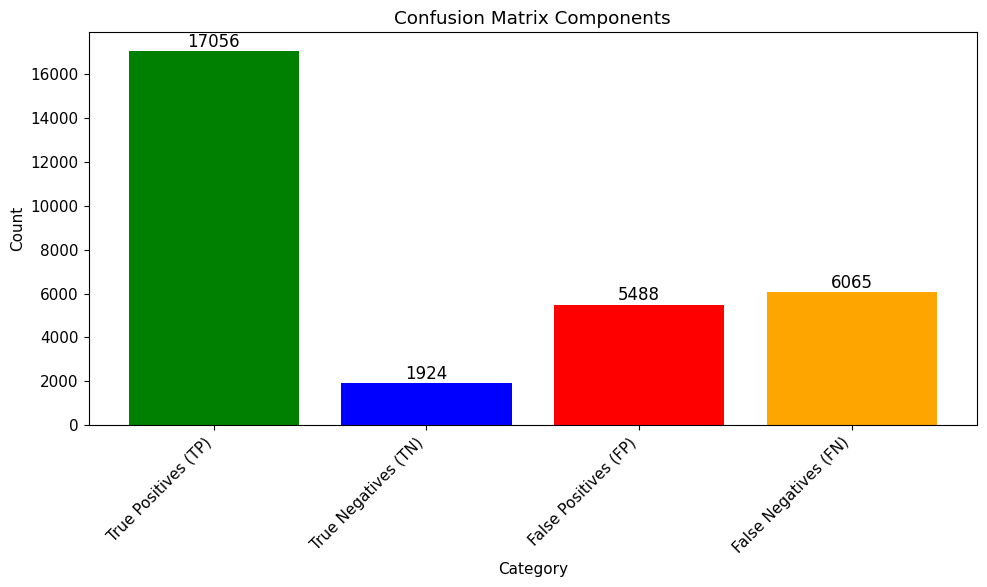

In [27]:
# ÌòºÎèô ÌñâÎ†¨ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
import matplotlib.pyplot as plt
import numpy as np

# ÌòºÎèô ÌñâÎ†¨ Í∞í
TP = tp
TN = tn
FP = fp
FN = fn

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
categories = ['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)']
values = [TP, TN, FP, FN]

# matplotlib ÏÑ§Ï†ï
%matplotlib inline

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['green', 'blue', 'red', 'orange'])

# Í∑∏ÎûòÌîÑÏóê Î†àÏù¥Î∏î Ï∂îÍ∞Ä
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Confusion Matrix Components')
plt.xticks(rotation=45, ha='right')

# Í∞í ÌëúÏãú
for i, v in enumerate(values):
    plt.text(i, v + 200, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Precision: 0.76
Recall: 0.74
F1 Score: 0.75


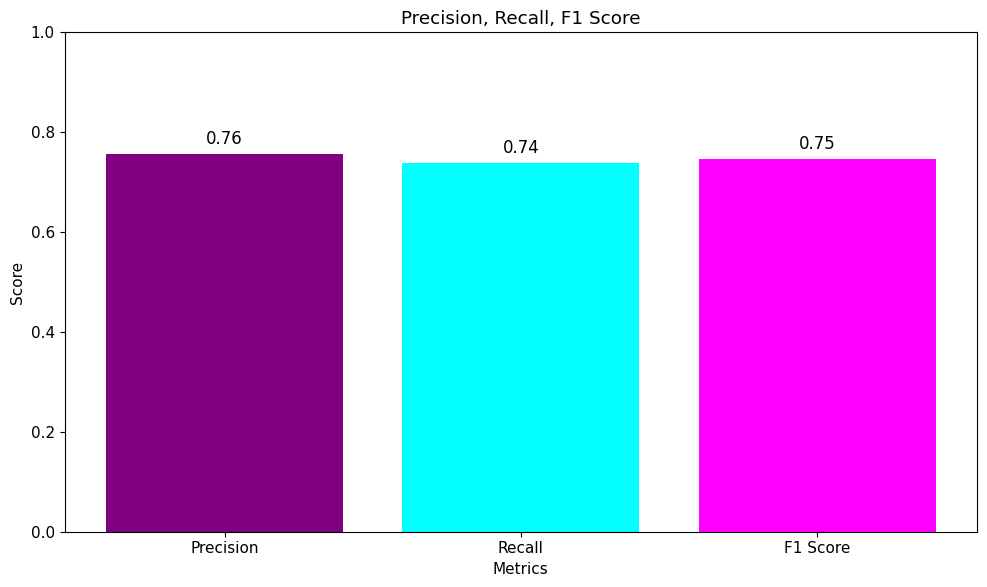

In [28]:
# Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1 Ï†êÏàò Í≥ÑÏÇ∞
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1 Ï†êÏàò Ï∂úÎ†•
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1 Ï†êÏàò ÏãúÍ∞ÅÌôî
metrics_categories = ['Precision', 'Recall', 'F1 Score']
metrics_values = [precision, recall, f1_score]

plt.figure(figsize=(10, 6))
plt.bar(metrics_categories, metrics_values, color=['purple', 'cyan', 'magenta'])

# Í∑∏ÎûòÌîÑÏóê Î†àÏù¥Î∏î Ï∂îÍ∞Ä
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, F1 Score')
plt.ylim(0, 1)

# Í∞í ÌëúÏãú
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
